In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

module_path = '/Users/morton/PycharmProjects/freerec'
data_file = os.path.join(module_path, 'data', 'cfr_raw_data.csv')

In [2]:
# read information about all trials
df = pd.read_csv(data_file, dtype={'category': 'category'})
df.category.cat.as_ordered(inplace=True)
df

,subject,list,position,trial_type,item,session,list_type,category,response,response_time
0,1,1,1,study,TOWEL,1,pure,obj,3.0,1.517
1,1,1,2,study,LADLE,1,pure,obj,3.0,1.404
2,1,1,3,study,THERMOS,1,pure,obj,3.0,0.911
3,1,1,4,study,LEGO,1,pure,obj,3.0,0.883
4,1,1,5,study,BACKPACK,1,pure,obj,3.0,0.819
...,...,...,...,...,...,...,...,...,...,...
71224,47,48,12,recall,CD,3,mixed,obj,3.0,1.592
71225,47,48,13,recall,SURGE PROTECTOR,3,mixed,obj,4.0,1.305
71226,47,48,14,recall,DOORKNOB,3,mixed,obj,4.0,1.467
71227,47,48,15,recall,LENIN MAUSOLEUM,3,mixed,loc,4.0,1.123


In [3]:
# merge information from study and recall trials
keys = ['subject', 'list', 'item', 'session', 'list_type']
dfm = pd.merge(df.loc[df['trial_type'] == 'study'].drop(columns='trial_type'),
               df.loc[df['trial_type'] == 'recall'][keys + ['position']],
               left_on=keys, right_on=keys, how='outer')

In [4]:
dfi = dfm.rename(columns={'position_x': 'input', 'position_y': 'output'})
dfi.loc[:, 'recalled'] = dfi['output'].notna().astype('int')
dfi

,subject,list,input,item,session,list_type,category,response,response_time,output,recalled
0,1,1,1.0,TOWEL,1,pure,obj,3.0,1.517,13.0,1
1,1,1,2.0,LADLE,1,pure,obj,3.0,1.404,NaN,0
2,1,1,3.0,THERMOS,1,pure,obj,3.0,0.911,NaN,0
3,1,1,4.0,LEGO,1,pure,obj,3.0,0.883,18.0,1
4,1,1,5.0,BACKPACK,1,pure,obj,3.0,0.819,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...
48168,47,32,NaN,PETRA,2,pure,NaN,NaN,NaN,17.0,1
48169,47,37,NaN,SOCK,3,pure,NaN,NaN,NaN,14.0,1
48170,47,39,NaN,HOOVER DAM,3,pure,NaN,NaN,NaN,15.0,1
48171,47,45,NaN,PEN,3,mixed,NaN,NaN,NaN,5.0,1


In [5]:
#dfi.query('subject == 1 and list == 1')
list1 = dfi.loc[(dfi['subject'] == 47) & (dfi['list'] == 32)]
list1.sort_values('input')

,subject,list,input,item,session,list_type,category,response,response_time,output,recalled
46269,47,32,1.0,LES INVALIDES,2,pure,loc,3.0,1.777,13.0,1
46270,47,32,2.0,MOUNT BLANC,2,pure,loc,2.0,1.073,NaN,0
46271,47,32,3.0,GALAPAGOS ISLANDS,2,pure,loc,2.0,1.257,NaN,0
46272,47,32,4.0,ANGKOR WAT,2,pure,loc,4.0,1.362,14.0,1
46273,47,32,5.0,WHITE CLIFFS OF DOVER,2,pure,loc,3.0,1.680,5.0,1
46274,47,32,6.0,YELLOWSTONE,2,pure,loc,3.0,1.020,3.0,1
46275,47,32,7.0,CAPE OF GOOD HOPE,2,pure,loc,3.0,1.015,4.0,1
46276,47,32,8.0,NEWGRANGE,2,pure,loc,4.0,2.314,15.0,1
46277,47,32,9.0,SHANGHAI,2,pure,loc,4.0,1.530,8.0,1
46278,47,32,10.0,AYERS ROCK,2,pure,loc,3.0,1.438,NaN,0


In [6]:
# get just the first output for each item so repeats are not double counted
dff = dfi.sort_values('output').groupby(['subject', 'list', 'item']).first()

# remove intrusions
clean = dff.loc[dff['input'].notna()]
clean

input  session list_type category  response  \
subject list item                                                            
1       1    BACKPACK            5.0        1      pure      obj       3.0   
             BAYONET            17.0        1      pure      obj       1.0   
             CAR SEAT           16.0        1      pure      obj       3.0   
             CHAIN              24.0        1      pure      obj       4.0   
             DOORKNOB            8.0        1      pure      obj       3.0   
...                              ...      ...       ...      ...       ...   
47      48   SALT FLATS          6.0        3     mixed      loc       1.0   
             SUPREME COURT      16.0        3     mixed      loc       2.0   
             SURGE PROTECTOR    11.0        3     mixed      obj       4.0   
             VIN DIESEL         23.0        3     mixed      cel       3.0   
             WRIGLEY BUILDING   17.0        3     mixed      loc       2.0   

                               response_time  output  recalled  
subject list item                                               
1       1    BACKPACK                  0.819    10.0         1  
             BAYONET                   0.828     3.0         1  
             CAR SEAT                  0.678     5.0         1  
             CHAIN                     0.855     1.0         1  
             DOORKNOB                  0.915    11.0         1  
...                                      ...     ...       ...  
47      48   SALT FLATS                1.052     8.0         1  
             SUPREME COURT             2.027     NaN         0  
             SURGE PROTECTOR           1.305    13.0         1  
             VIN DIESEL                1.213     2.0         1  
             WRIGLEY BUILDING          1.893     NaN         0  

[46080 rows x 8 columns]

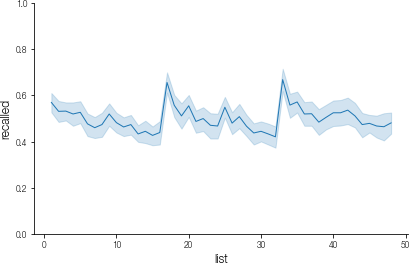

In [7]:
rec_list = clean.groupby(['subject', 'list'])['recalled'].mean()
g = sns.lineplot(x='list', y='recalled', data=rec_list.reset_index());
g.set_ylim(0, 1);

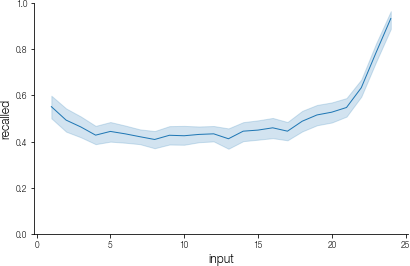

In [8]:
rec_pos = clean.groupby(['subject', 'input'])['recalled'].mean()
g = sns.lineplot(x='input', y='recalled', data=rec_pos.reset_index());
g.set_ylim(0, 1);

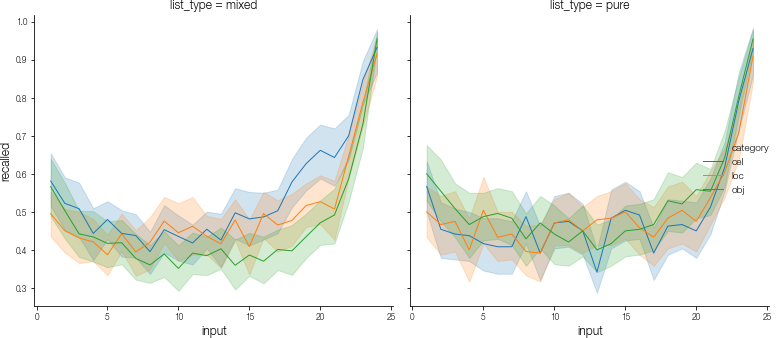

In [9]:
rec = clean.groupby(['subject', 'list_type', 'category', 'input'])['recalled'].mean()
g = sns.relplot(kind='line', x='input', y='recalled', col='list_type', 
                hue='category', data=rec.reset_index())

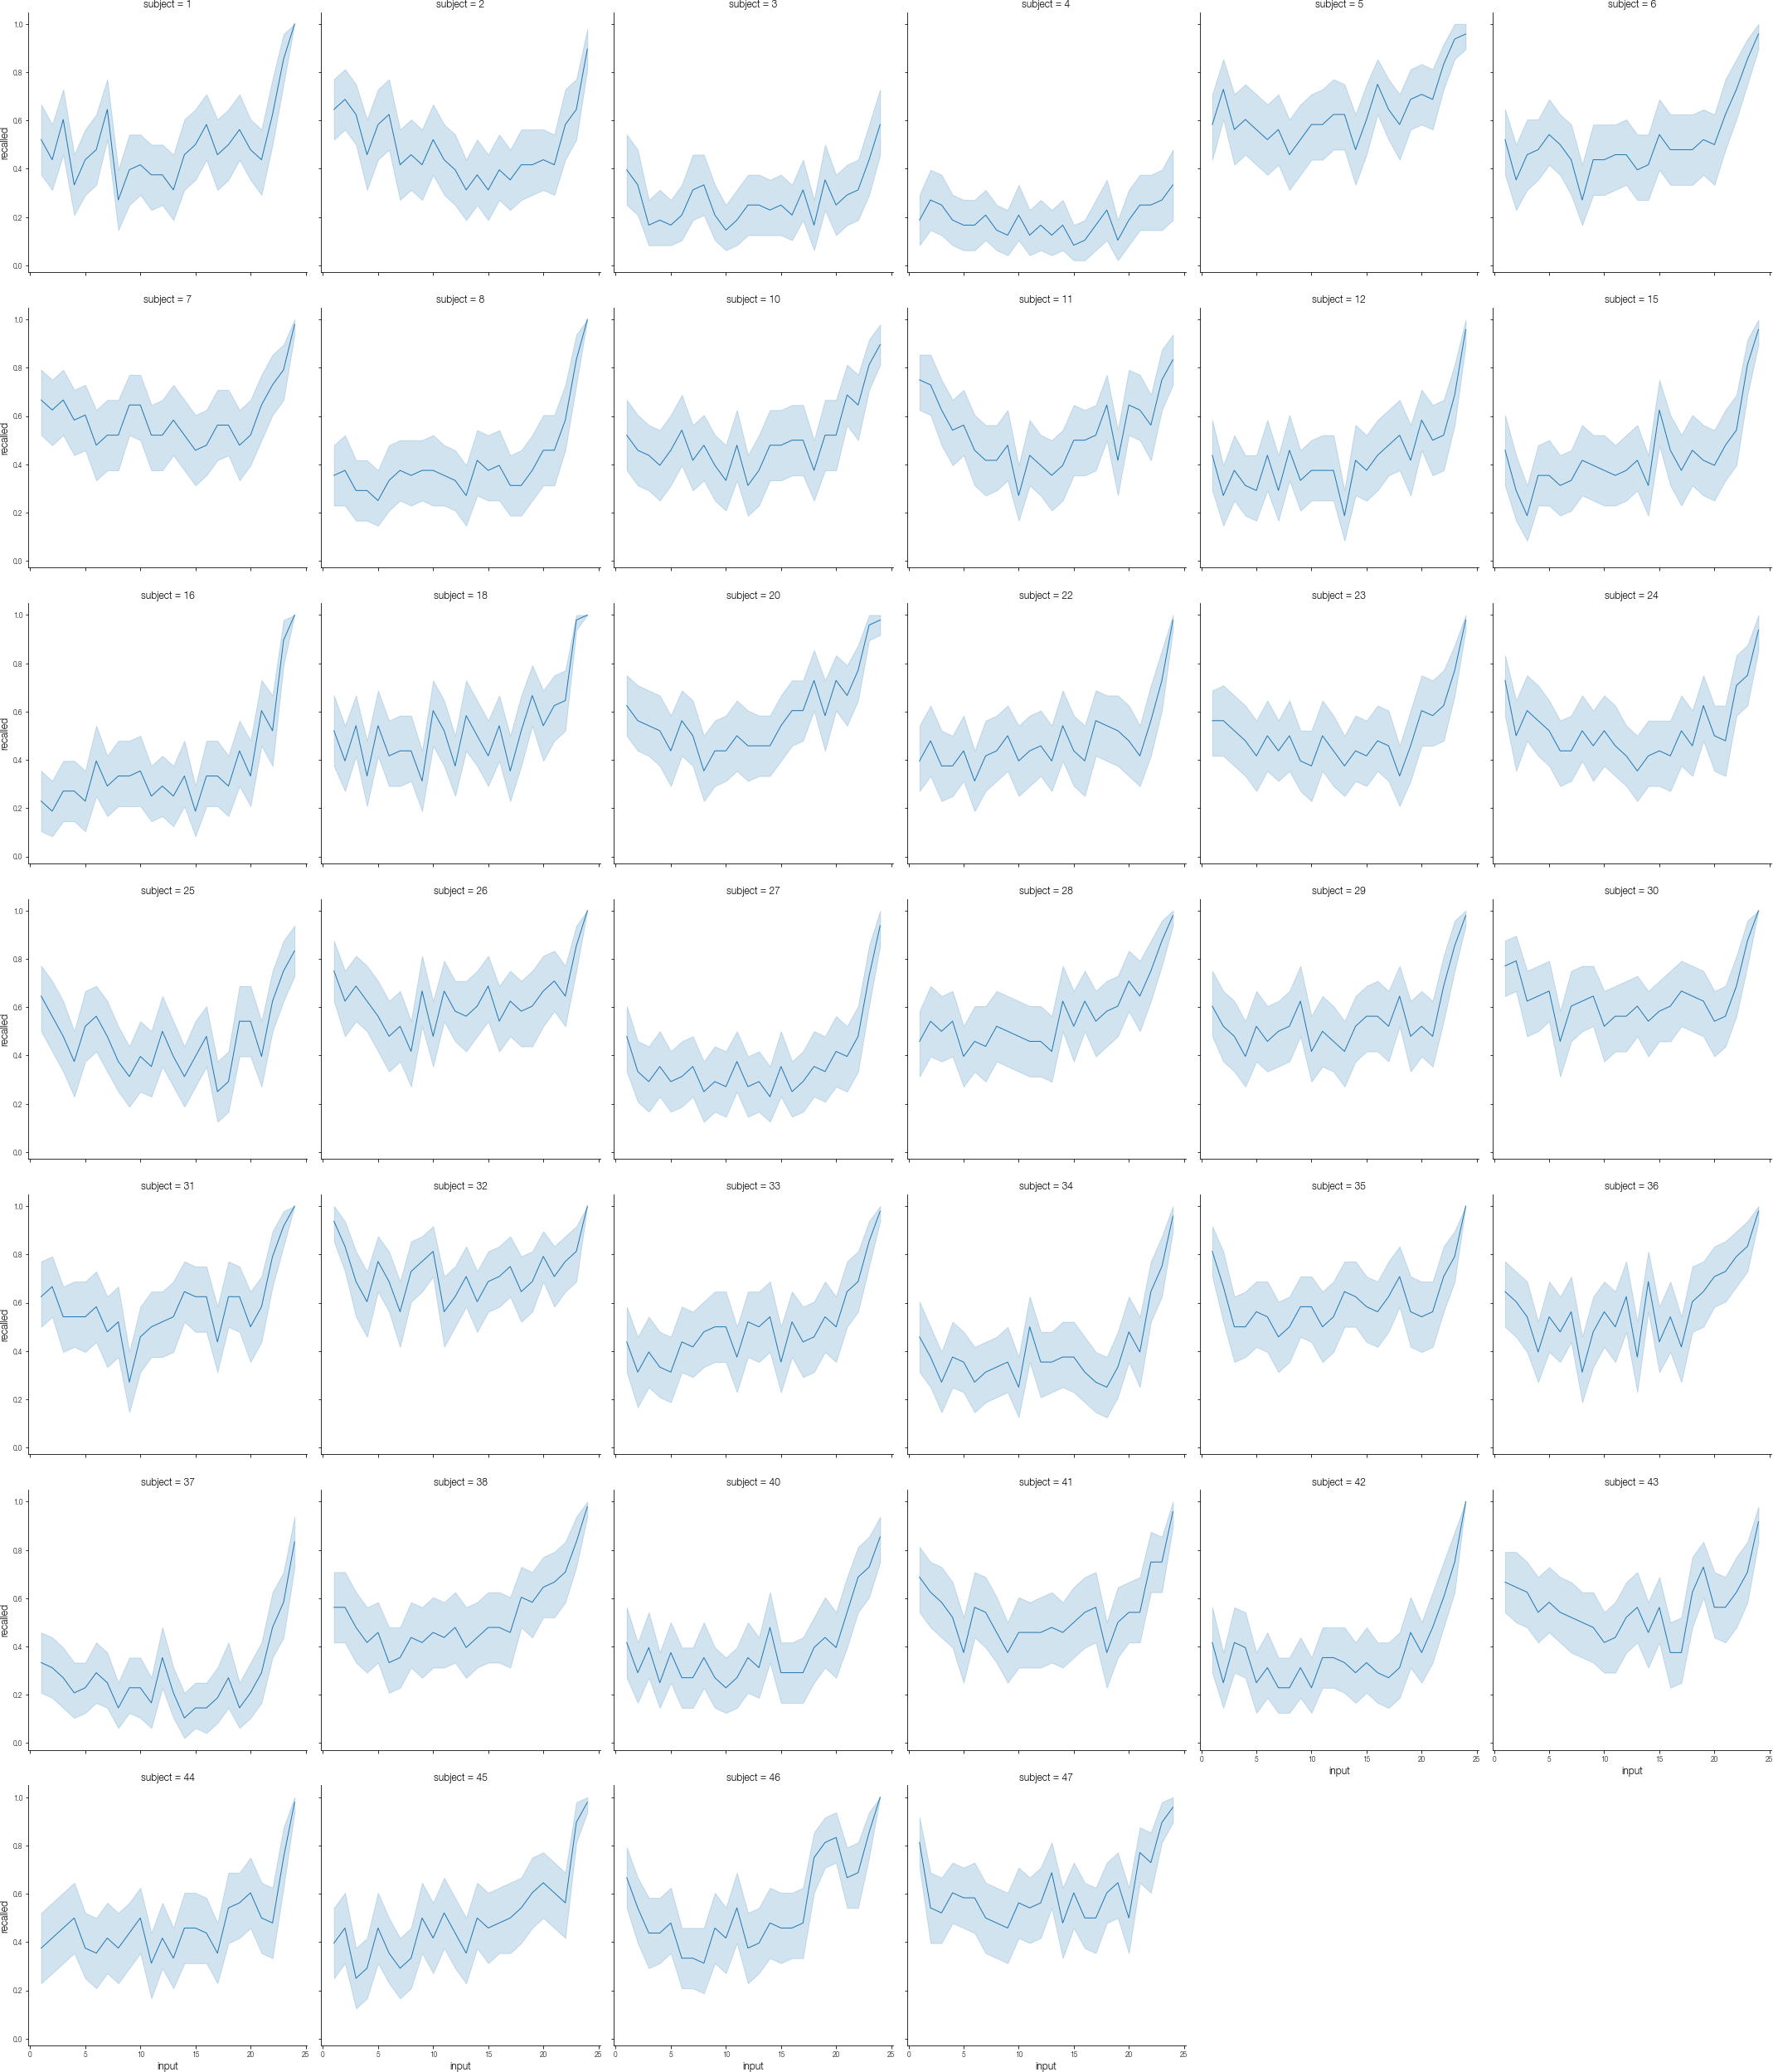

In [10]:
#rec = clean.groupby(['subject', 'input'])['recalled'].mean()
g = sns.relplot(kind='line', x='input', y='recalled', 
                col='subject', col_wrap=6, 
                data=clean.reset_index())